# Check Interfaces

## Define model

Let's create a new model. First we import solver interface:

In [1]:
import numpy as np
from scifit.interfaces.generic import FitSolverInterface

Pretend we want to fit someting like:

$$y = a \cdot x + \sqrt{b \cdot x^2 + \pi} + \exp (-c \cdot x) + d$$

Probably not the best problem formulation but insighful for an example. In goes as follows:

In [2]:
class MyModel(FitSolverInterface):
    @staticmethod
    def model(x, a, b, c, d):
        return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d

Instantiate the new solver:

In [3]:
solver = MyModel()

## Load data

Now we generate some synthetic dataset for a given problem:

In [4]:
X = solver.feature_dataset(xmin=-5.0, xmax=15.0, dimension=1, resolution=100)

In [5]:
X.shape

(100, 1)

In [6]:
p = [1.38, 2.21, 0.81, -4.67]

In [7]:
t = solver.target_dataset(X, parameters=p, sigma=0.075, scale_mode="auto", seed=1234, full_output=True)

In [8]:
y = t["y"]
s = t["sy"]

In [9]:
y.shape

(100,)

In [10]:
s.shape

(100,)

## Solve Fit

Everything is setup, we can solve our problem:

In [11]:
solution = solver.fit(X, y, sigma=s)

C:\Users\developer\AppData\Local\Temp\ipykernel_1412\3029776148.py:4: RuntimeWarning: invalid value encountered in sqrt
  return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d
C:\Users\developer\AppData\Local\Temp\ipykernel_1412\3029776148.py:4: RuntimeWarning: overflow encountered in exp
  return a * x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + np.exp(-c * x[:, 0]) + d


In [12]:
solver.solved()

True

In [13]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [14]:
print(solution["parameters"])

[ 1.45767296  1.91801321  0.81351517 -4.41465325]


In [15]:
print(np.diag(solution["covariance"]))

[2.53072542e-02 2.50464355e-01 7.28825878e-05 1.60966656e-01]


As we can see, parameters suffer high variances probably due to problem formulation and noise intensity.

## Render solution

Finally we can render fit and loss function to check the dynamic:

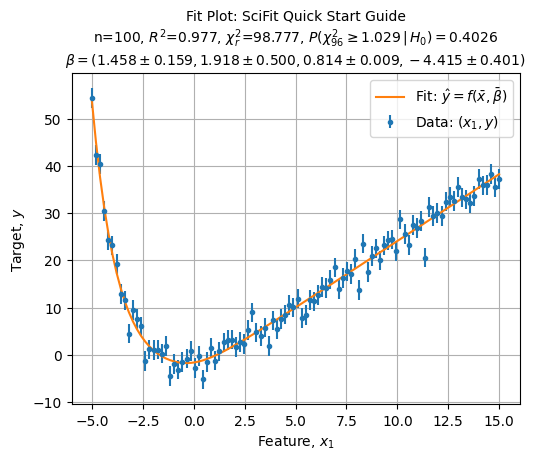

In [16]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

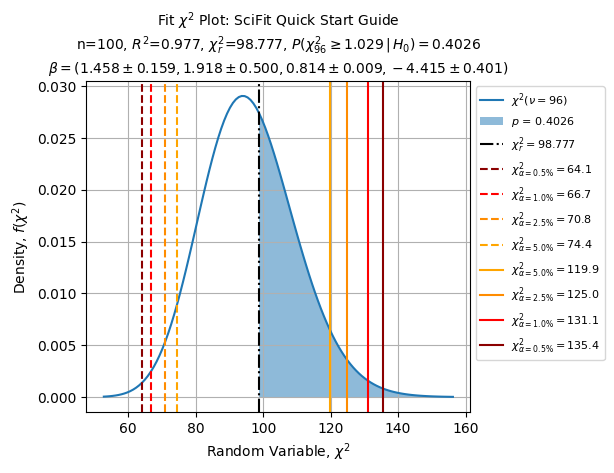

In [17]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

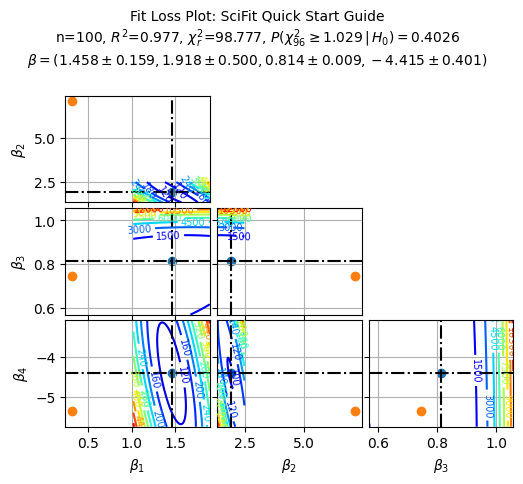

In [18]:
axe = solver.plot_loss(title="SciFit Quick Start Guide")

In [19]:
from scipy import optimize 

In [20]:
loss = solver.parametrized_loss(solver._xdata, solver._ydata, sigma=solver._sigma)

In [21]:
def floss(p):
    return loss(*p)

In [22]:
p0 = (0,0,0,0)

In [23]:
loss(*p0)

array(8142.7446988)

In [24]:
floss(p0)

array(8142.7446988)

In [25]:
optimize.minimize(floss, x0=p0)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 98.7770709462257
        x: [ 1.458e+00  1.918e+00  8.135e-01 -4.415e+00]
      nit: 39
      jac: [ 9.060e-05  3.624e-05  3.328e-04  1.907e-05]
 hess_inv: [[ 2.217e-04 -2.770e-05  1.226e-05  1.280e-03]
            [-2.770e-05  2.560e-04  3.430e-06 -1.772e-04]
            [ 1.226e-05  3.430e-06  1.014e-05  3.292e-05]
            [ 1.280e-03 -1.772e-04  3.292e-05  7.547e-03]]
     nfev: 260
     njev: 52

In [26]:
r = optimize.minimize(floss, x0=p,) #method="L-BFGS-B")
r

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 98.77707094622467
        x: [ 1.458e+00  1.918e+00  8.135e-01 -4.415e+00]
      nit: 18
      jac: [ 1.717e-05  1.907e-06  2.861e-06 -3.815e-06]
 hess_inv: [[ 2.516e-03 -2.513e-03  2.100e-04 -1.353e-05]
            [-2.513e-03  2.600e-03 -2.001e-04 -3.471e-04]
            [ 2.100e-04 -2.001e-04  2.687e-05 -3.954e-05]
            [-1.353e-05 -3.471e-04 -3.954e-05  1.443e-03]]
     nfev: 160
     njev: 32

In [27]:
s = optimize.least_squares(floss, x0=p, gtol=1e-12)
s

     message: The maximum number of function evaluations is exceeded.
     success: False
      status: 0
         fun: [ 9.919e+01]
           x: [ 1.383e+00  2.203e+00  8.106e-01 -4.655e+00]
        cost: 4919.616413887773
         jac: [[-4.977e-02  1.043e+00 -3.991e+00 -2.108e+00]]
        grad: [-4.937e+00  1.034e+02 -3.958e+02 -2.091e+02]
  optimality: 395.83331371478994
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 400
        njev: 393

In [28]:
J = r.jac.reshape(1, -1)

In [29]:
Q = J.T @ J
Q

array([[ 2.94676283e-10,  3.27418093e-11,  4.91127139e-11,
        -6.54836185e-11],
       [ 3.27418093e-11,  3.63797881e-12,  5.45696821e-12,
        -7.27595761e-12],
       [ 4.91127139e-11,  5.45696821e-12,  8.18545232e-12,
        -1.09139364e-11],
       [-6.54836185e-11, -7.27595761e-12, -1.09139364e-11,
         1.45519152e-11]])

In [30]:
np.linalg.svd(Q)

SVDResult(U=array([[-9.58043332e-01,  2.60961402e-01, -1.18541642e-01,
         1.01971077e-17],
       [-1.06449259e-01, -2.20914293e-01,  3.73985869e-01,
         8.94427191e-01],
       [-1.59673889e-01, -8.29387438e-01, -5.35369710e-01,
         1.07149511e-16],
       [ 2.12898518e-01,  4.41828586e-01, -7.47971739e-01,
         4.47213595e-01]]), S=array([3.21051630e-10, 2.28418683e-27, 3.42108860e-28, 4.50372090e-44]), Vh=array([[-9.58043332e-01, -1.06449259e-01, -1.59673889e-01,
         2.12898518e-01],
       [-2.72208913e-01,  2.59901691e-01,  7.66914507e-01,
        -5.19803383e-01],
       [-8.97512235e-02,  3.48022508e-01, -6.21567685e-01,
        -6.96045016e-01],
       [ 0.00000000e+00,  8.94427191e-01, -8.52596105e-17,
         4.47213595e-01]]))